<a href="https://colab.research.google.com/github/petrusthelastking/TANDANG_GAWE_KUIS_ULO-PYTHON-/blob/main/JS04_Klasterisasi_Petrus_Tyang_A_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PRAKTIKUM 1

In [ ]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

display(X.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


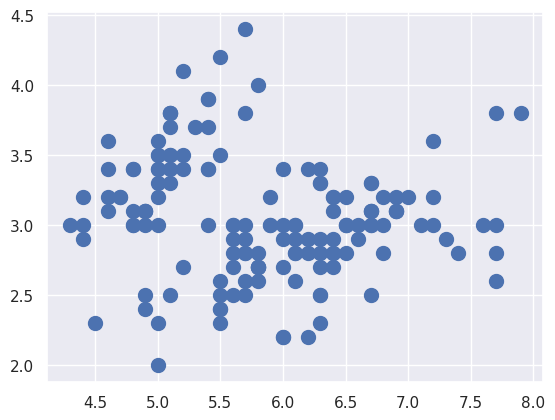

In [ ]:
plt.scatter(X.iloc[:,0], X.iloc[:, 1], s=100)

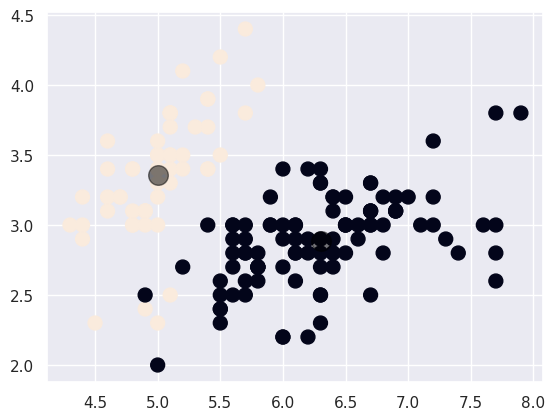

In [ ]:
from sklearn.cluster import KMeans
cl_kmeans = KMeans(n_clusters=2)
y_kmeans = cl_kmeans.fit_predict(X)

plt.scatter(X.iloc[:,0], X.iloc[:, 1], s=100, c=y_kmeans)
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


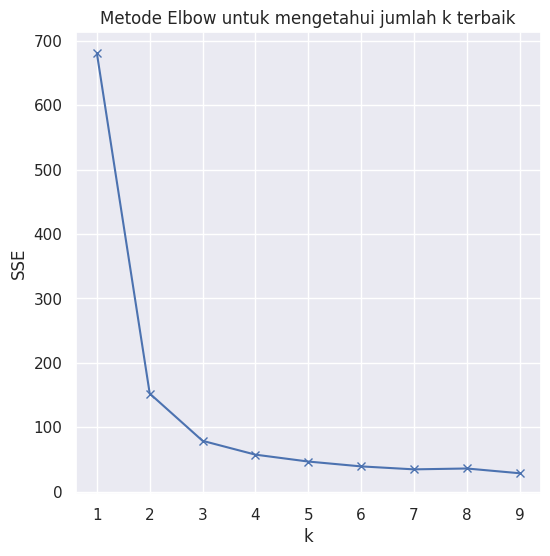

In [ ]:
sse = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(X)
  sse.append(kmeanModel.inertia_)

plt.figure(figsize=(6, 6))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk mengetahui jumlah k terbaik")
plt.show()

In [ ]:
for idx, sse_val in enumerate(sse, start=1):
  print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=57.4732732654949
k=5; SSE=46.782100000000014
k=6; SSE=39.251830892636775
k=7; SSE=34.63351788897376
k=8; SSE=35.98406214779375
k=9; SSE=28.595584156040047


## PRAKTIKUM 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

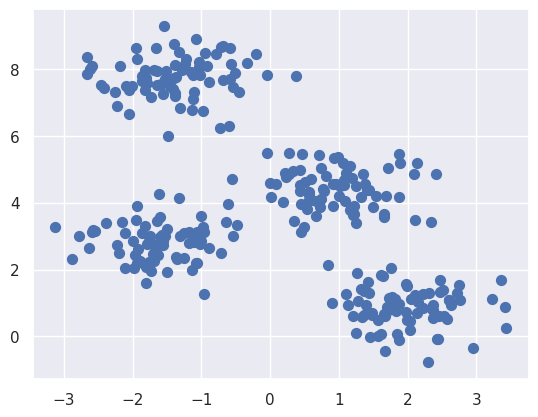

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

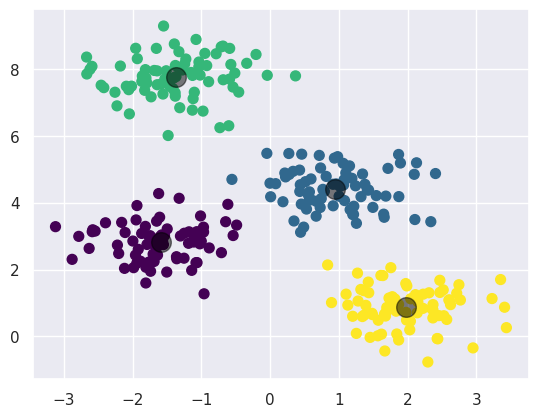

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

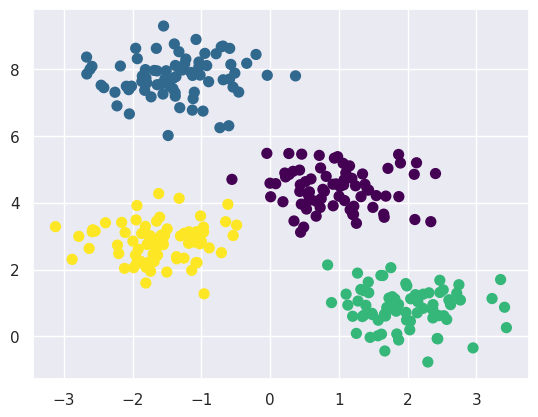

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

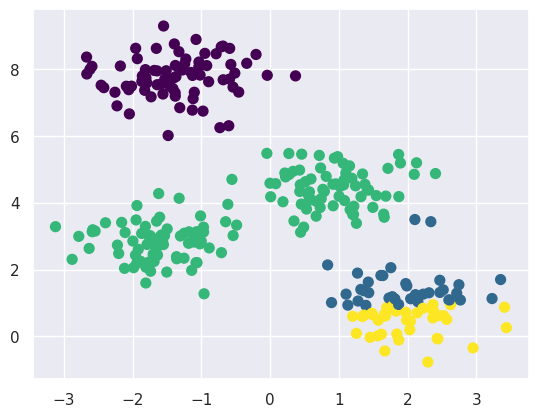

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

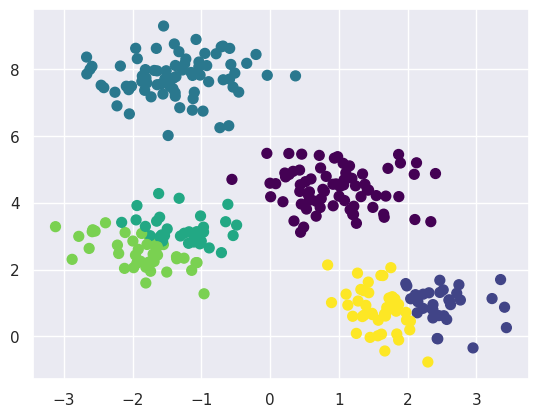

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

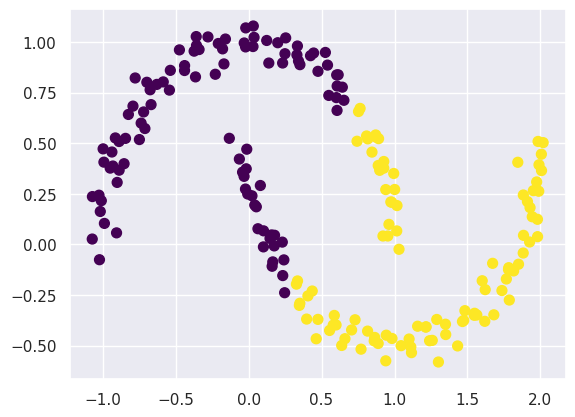

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


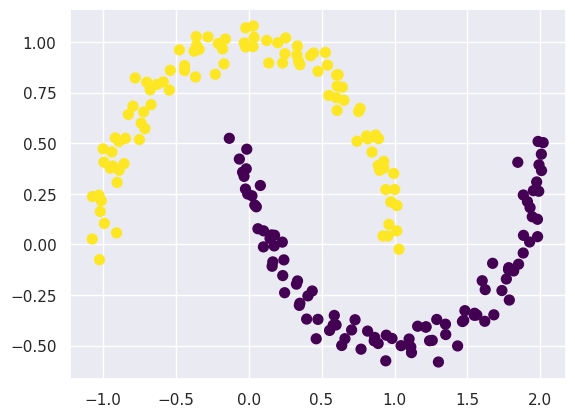

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

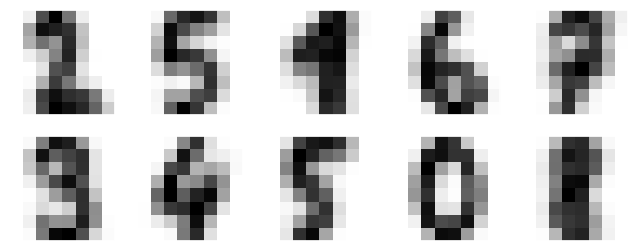

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

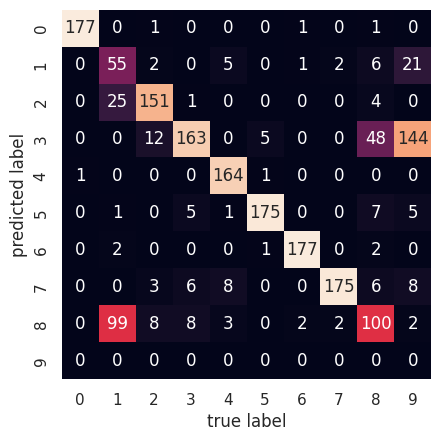

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

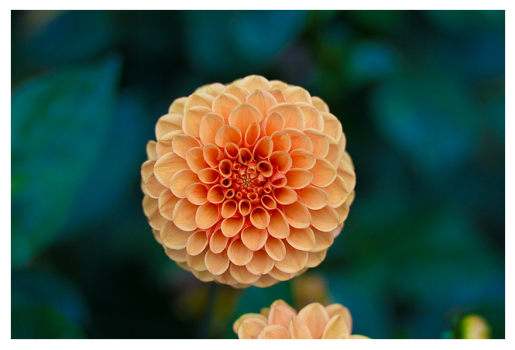

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [ ]:
flower.shape

(427, 640, 3)

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

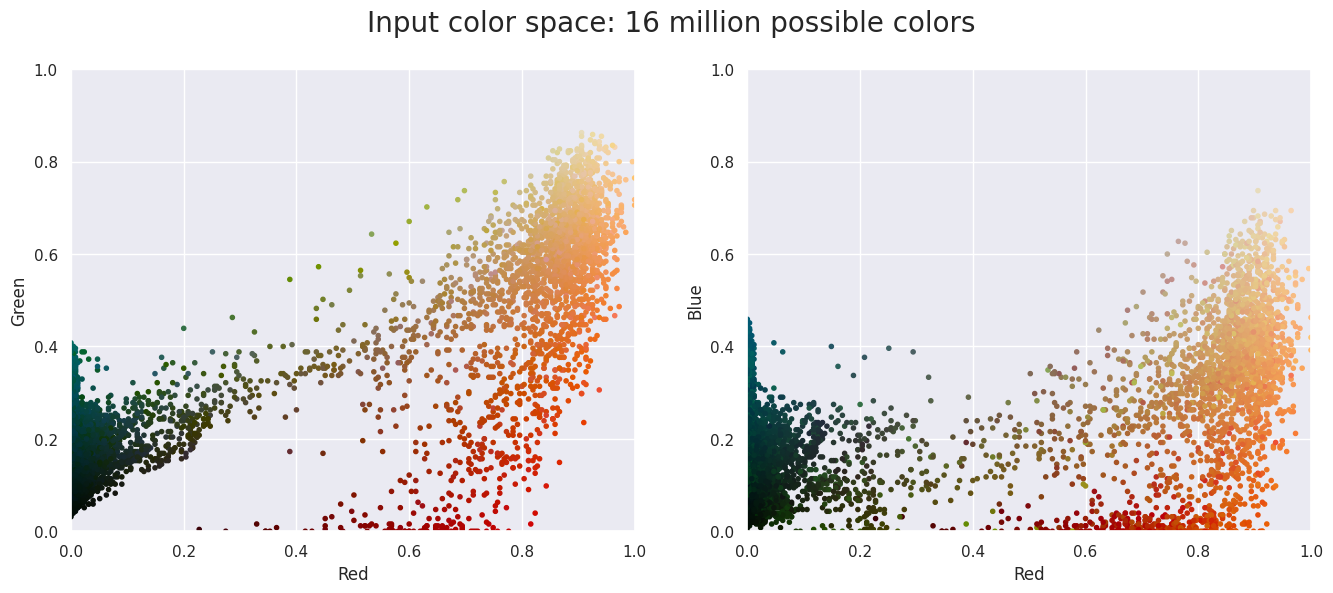

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

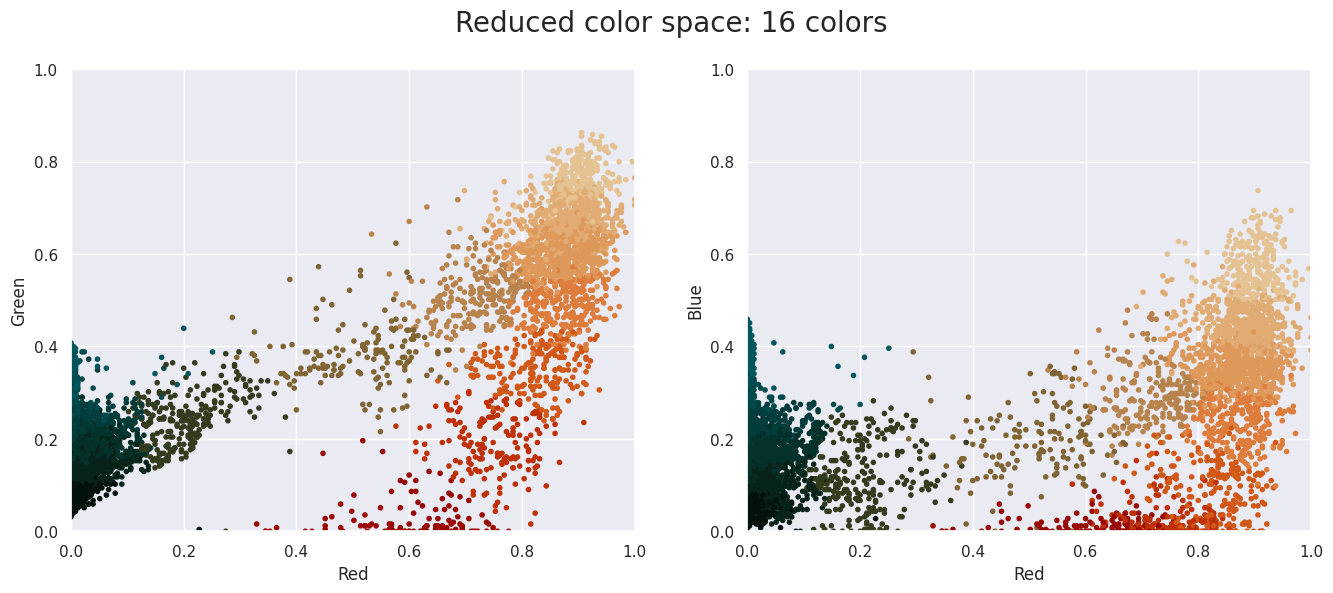

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

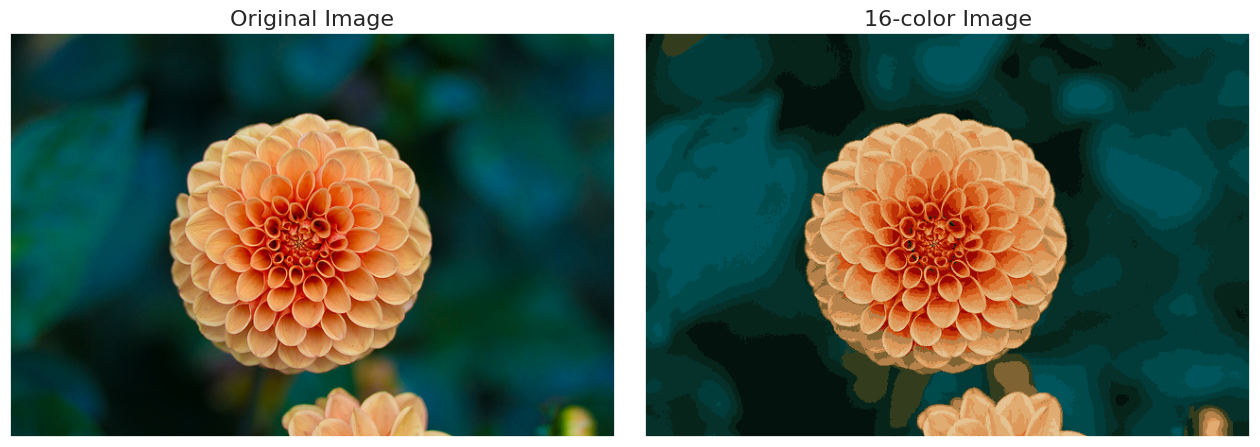

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

## PRAKTIKUM 3

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

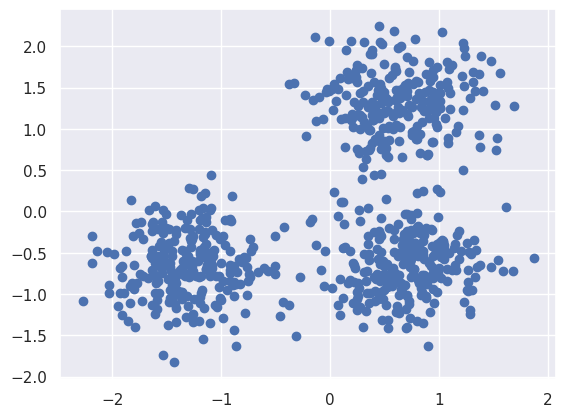

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [ ]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


In [ ]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


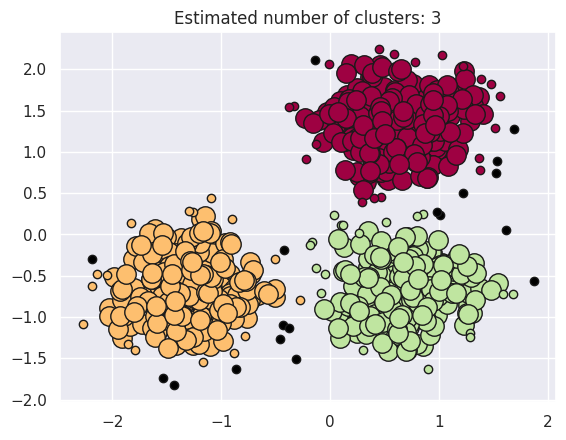

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# TUGAS PRAKTIKUM 1

In [ ]:
df_mall = pd.read_csv('Mall_Customers.csv')
display(df_mall.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
X_mall = df_mall[['Annual Income (k$)', 'Spending Score (1-100)']]
display(X_mall.head())

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


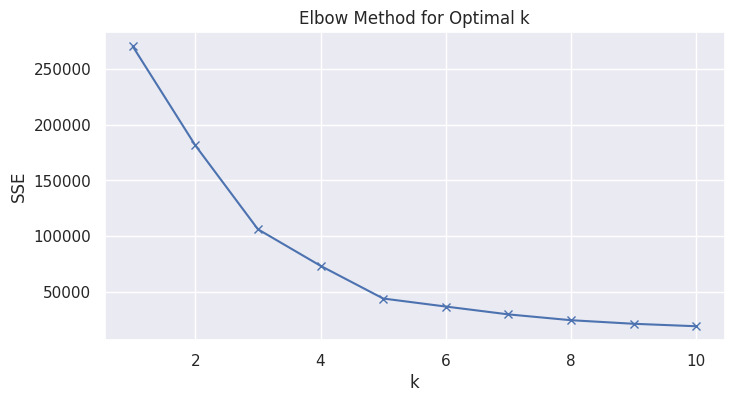

In [ ]:
sse = []
K = range(1, 11) # Iterate from 1 to 10 as instructed
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=0, n_init=10) # Added random_state and n_init for reproducibility
    kmeans_model.fit(X_mall)
    sse.append(kmeans_model.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k")
plt.show()

In [ ]:
# Based on the elbow plot, the optimal number of clusters appears to be 5.
optimal_k = 5

# Instantiate KMeans with the optimal k
kmeans_mall = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)

# Fit the model to the data
kmeans_mall.fit(X_mall)

# Get the cluster labels
y_kmeans_mall = kmeans_mall.predict(X_mall)

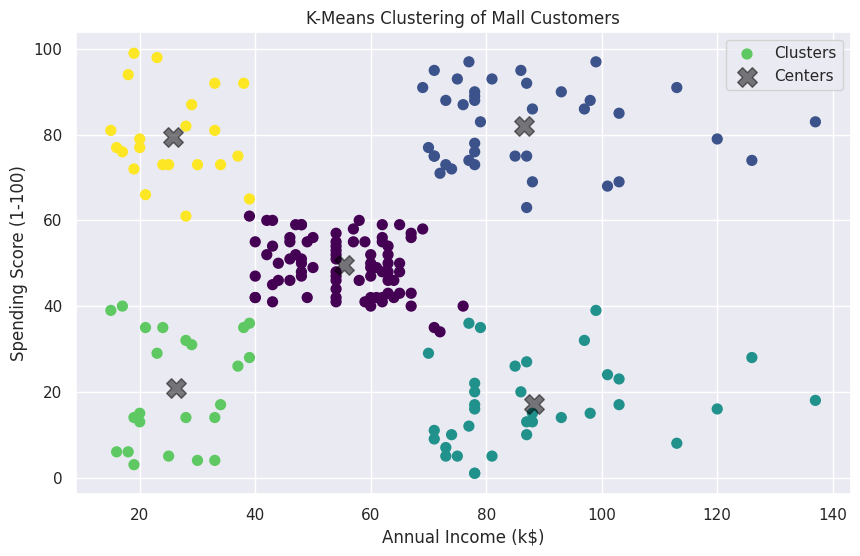

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_mall.iloc[:, 0], X_mall.iloc[:, 1], c=y_kmeans_mall, s=50, cmap='viridis', label='Clusters')

centers = kmeans_mall.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='X', label='Centers')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering of Mall Customers')
plt.legend()
plt.show()

# TUGAS PRAKTIKUM 2

Estimated number of clusters: 2
Estimated number of noise points: 0

DBSCAN Evaluation Metrics:
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392


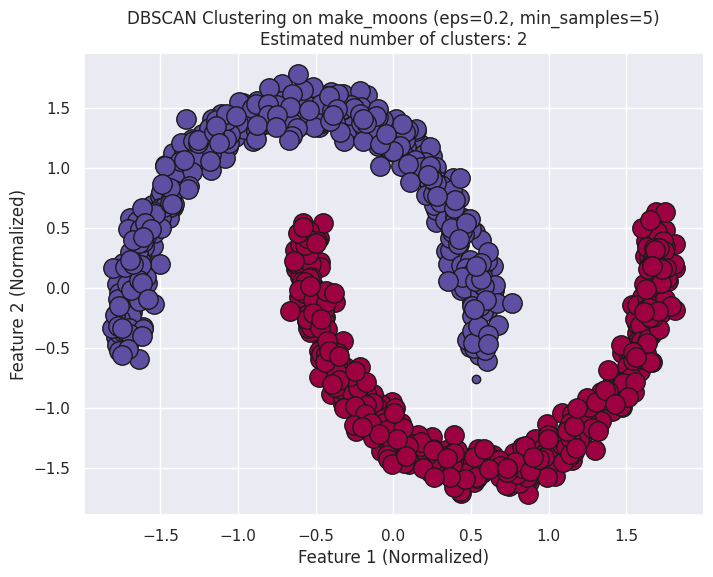

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

# 1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.
X_moons, y_moons_true = make_moons(n_samples=1000, noise=0.05, random_state=0)
X_moons = StandardScaler().fit_transform(X_moons)

# 2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.
dbscan_moons = DBSCAN(eps=0.2, min_samples=5).fit(X_moons)
labels_moons = dbscan_moons.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_moons = len(set(labels_moons)) - (1 if -1 in labels_moons else 0)
n_noise_moons = list(labels_moons).count(-1)

print(f"Estimated number of clusters: {n_clusters_moons}")
print(f"Estimated number of noise points: {n_noise_moons}")

# 3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.
print("\nDBSCAN Evaluation Metrics:")
print(f"Homogeneity: {metrics.homogeneity_score(y_moons_true, labels_moons):.3f}")
print(f"Completeness: {metrics.completeness_score(y_moons_true, labels_moons):.3f}")
print(f"V-measure: {metrics.v_measure_score(y_moons_true, labels_moons):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y_moons_true, labels_moons):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y_moons_true, labels_moons):.3f}"
)
# Silhouette Coefficient is not defined for a single cluster or when all points are noise
if n_clusters_moons > 1 and n_noise_moons < len(X_moons):
    print(f"Silhouette Coefficient: {metrics.silhouette_score(X_moons, labels_moons):.3f}")
else:
    print("Silhouette Coefficient: Not applicable (single cluster or all noise)")


# 4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).
unique_labels_moons = set(labels_moons)
core_samples_mask_moons = np.zeros_like(labels_moons, dtype=bool)
core_samples_mask_moons[dbscan_moons.core_sample_indices_] = True

colors_moons = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_moons))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels_moons, colors_moons):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels_moons == k

    xy = X_moons[class_member_mask & core_samples_mask_moons]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_moons[class_member_mask & ~core_samples_mask_moons]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"DBSCAN Clustering on make_moons (eps={0.2}, min_samples={5})\nEstimated number of clusters: {n_clusters_moons}")
plt.xlabel("Feature 1 (Normalized)")
plt.ylabel("Feature 2 (Normalized)")
plt.show()

# TUGAS PRIBADI


In [ ]:
# Load the supplementary data
try:
    df_journal = pd.read_csv('computers-1942271-supplementary.csv', encoding='latin1', skiprows=1) # Try 'latin1' encoding
    # Assign meaningful column names based on the output of the previous run
    df_journal.columns = ['Unnamed: 0', 'Name_of_Movie', 'Release_Year', 'Duration_of_Flim', 'Rating', 'Score', 'Votes', 'income']
    display(df_journal.head())
except UnicodeDecodeError:
    try:
        df_journal = pd.read_csv('computers-1942271-supplementary.csv', encoding='ISO-8859-1', skiprows=1) # Try 'ISO-8859-1' encoding
        # Assign meaningful column names based on the output of the previous run
        df_journal.columns = ['Unnamed: 0', 'Name_of_Movie', 'Release_Year', 'Duration_of_Flim', 'Rating', 'Score', 'Votes', 'income']
        display(df_journal.head())
    except Exception as e:
        print(f"Error loading the CSV file with both latin1 and ISO-8859-1 encodings: {e}")
        print("Please check the file encoding or provide the correct one.")
except FileNotFoundError:
    print("Error: 'computers-1942271-supplementary.csv' not found.")
    print("Please make sure the file is uploaded to the correct location.")

,Unnamed: 0,Name_of_Movie,Release_Year,Duration_of_Flim,Rating,Score,Votes,income
0,0,The Godfather,1972,175,9.2,100,1822871,134.97
1,1,T??ky?? monogatari,1953,136,8.2,0,61375,0.00
2,2,Shichinin no samurai,1954,207,8.6,98,342852,0.27
3,3,The Godfather Part II,1974,202,9.0,90,1250847,57.30
4,4,Casablanca,1942,102,8.5,100,565776,1.02


## Pemilihan Fitur untuk K-Means

In [ ]:
# Based on the journal or common practice for clustering, select the features for clustering.
# As an example, let's assume we select 'Feature1' and 'Feature2' for clustering.
# You may need to adjust these based on the actual data and journal's methodology.
# If the journal specifies certain columns, replace 'Feature1' and 'Feature2' with those column names.

# For demonstration, let's assume the relevant columns are 'attribute1' and 'attribute2'
# based on the typical structure of research data.
# **NOTE:** You will need to replace 'attribute1' and 'attribute2' with the actual column names
# from your `df_journal` that are used for clustering in the paper.
try:
    # Based on the head of the dataframe, the relevant columns seem to be 'Score' and 'income'.
    X_journal = df_journal[['Score', 'income']]
    print("Selected features: 'Score', 'income'")
except KeyError:
    print("Column names 'Score' or 'income' not found.")
    print("Please inspect your dataframe 'df_journal' to find the correct column names for clustering.")
    print("df_journal columns:", df_journal.columns.tolist())
    # As a fallback, let's select the last two columns if the above fail
    if df_journal.shape[1] >= 2:
        X_journal = df_journal.iloc[:, -2:]
        print(f"Falling back to selecting the last two columns: {X_journal.columns.tolist()}")
    else:
        X_journal = df_journal.copy()
        print("Dataframe has less than 2 columns. Using all columns for clustering.")


display(X_journal.head())

Selected features: 'Score', 'income'


,Score,income
0,100,134.97
1,0,0.00
2,98,0.27
3,90,57.30
4,100,1.02


## Jumlah Kluster Optimal (k) menggunakan Metode Elbow

Selected features: 'Score', 'income'


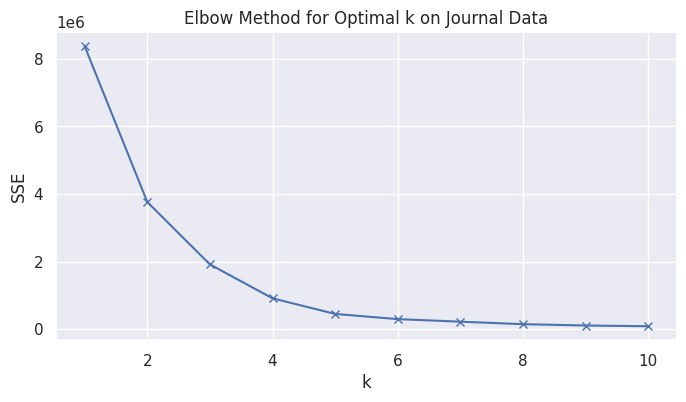

In [ ]:
# Based on the journal or common practice for clustering, select the features for clustering.
# As an example, let's assume we select 'Feature1' and 'Feature2' for clustering.
# You may need to adjust these based on the actual data and journal's methodology.
# If the journal specifies certain columns, replace 'Feature1' and 'Feature2' with those column names.

# For demonstration, let's assume the relevant columns are 'attribute1' and 'attribute2'
# based on the typical structure of research data.
# **NOTE:** You will need to replace 'attribute1' and 'attribute2' with the actual column names
# from your `df_journal` that are used for clustering in the paper.
try:
    # Based on the head of the dataframe, the relevant columns seem to be 'Score' and 'income'.
    X_journal = df_journal[['Score', 'income']]
    print("Selected features: 'Score', 'income'")
except KeyError:
    print("Column names 'Score' or 'income' not found.")
    print("Please inspect your dataframe 'df_journal' to find the correct column names for clustering.")
    print("df_journal columns:", df_journal.columns.tolist())
    # As a fallback, let's select the last two columns if the above fail
    if df_journal.shape[1] >= 2:
        X_journal = df_journal.iloc[:, -2:]
        print(f"Falling back to selecting the last two columns: {X_journal.columns.tolist()}")
    else:
        X_journal = df_journal.copy()
        print("Dataframe has less than 2 columns. Using all columns for clustering.")

sse_journal = []
K_journal = range(1, 11) # Iterate from 1 to 10 clusters
for k in K_journal:
    kmeans_model_journal = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans_model_journal.fit(X_journal)
    sse_journal.append(kmeans_model_journal.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_journal, sse_journal, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal k on Journal Data")
plt.show()

## Menerapkan Pengelompokan K-Means

In [ ]:
# Based on the journal or common practice for clustering, select the features for clustering.
# As an example, let's assume we select 'Feature1' and 'Feature2' for clustering.
# You may need to adjust these based on the actual data and journal's methodology.
# If the journal specifies certain columns, replace 'Feature1' and 'Feature2' with those column names.

# For demonstration, let's assume the relevant columns are 'attribute1' and 'attribute2'
# based on the typical structure of research data.
# **NOTE:** You will need to replace 'attribute1' and 'attribute2' with the actual column names
# from your `df_journal` that are used for clustering in the paper.
try:
    # Based on the head of the dataframe, the relevant columns seem to be 'Score' and 'income'.
    X_journal = df_journal[['Score', 'income']]
    print("Selected features: 'Score', 'income'")
except KeyError:
    print("Column names 'Score' or 'income' not found.")
    print("Please inspect your dataframe 'df_journal' to find the correct column names for clustering.")
    print("df_journal columns:", df_journal.columns.tolist())
    # As a fallback, let's select the last two columns if the above fail
    if df_journal.shape[1] >= 2:
        X_journal = df_journal.iloc[:, -2:]
        print(f"Falling back to selecting the last two columns: {X_journal.columns.tolist()}")
    else:
        X_journal = df_journal.copy()
        print("Dataframe has less than 2 columns. Using all columns for clustering.")

# Based on the elbow plot above, determine the optimal number of clusters.
# Replace 'optimal_k_journal' with the value you determine from the plot.
# For example, if the elbow is at k=3, set optimal_k_journal = 3
optimal_k_journal = 3 # <-- **Update this value based on the Elbow Plot**

# Instantiate KMeans with the optimal k
kmeans_journal = KMeans(n_clusters=optimal_k_journal, random_state=0, n_init=10)

# Fit the model to the data
kmeans_journal.fit(X_journal)

# Get the cluster labels
y_kmeans_journal = kmeans_journal.predict(X_journal)

print(f"K-Means clustering applied with k = {optimal_k_journal}")

Selected features: 'Score', 'income'
K-Means clustering applied with k = 3


## Visualisasikan Kluster

Selected features: 'Score', 'income'


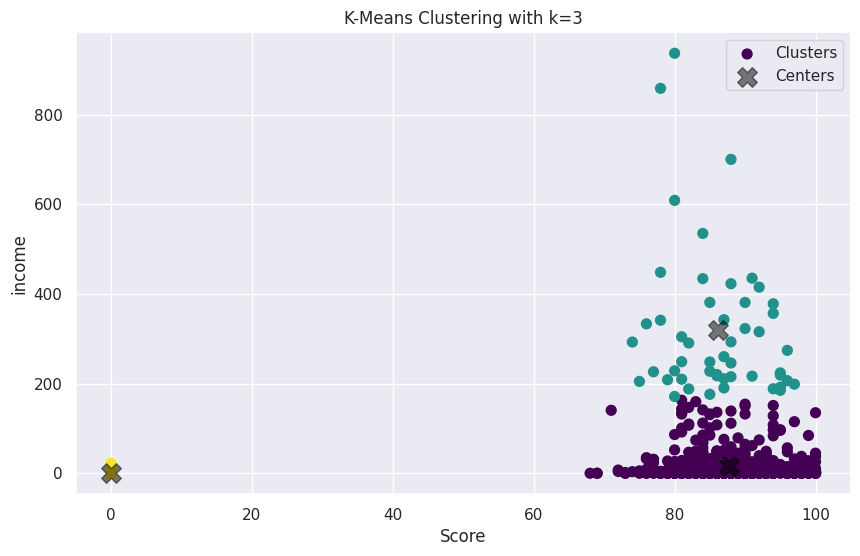

In [ ]:
# Based on the journal or common practice for clustering, select the features for clustering.
# As an example, let's assume we select 'Feature1' and 'Feature2' for clustering.
# You may need to adjust these based on the actual data and journal's methodology.
# If the journal specifies certain columns, replace 'Feature1' and 'Feature2' with those column names.

# For demonstration, let's assume the relevant columns are 'attribute1' and 'attribute2'
# based on the typical structure of research data.
# **NOTE:** You will need to replace 'attribute1' and 'attribute2' with the actual column names
# from your `df_journal` that are used for clustering in the paper.
try:
    # Based on the head of the dataframe, the relevant columns seem to be 'Score' and 'income'.
    X_journal = df_journal[['Score', 'income']]
    print("Selected features: 'Score', 'income'")
except KeyError:
    print("Column names 'Score' or 'income' not found.")
    print("Please inspect your dataframe 'df_journal' to find the correct column names for clustering.")
    print("df_journal columns:", df_journal.columns.tolist())
    # As a fallback, let's select the last two columns if the above fail
    if df_journal.shape[1] >= 2:
        X_journal = df_journal.iloc[:, -2:]
        print(f"Falling back to selecting the last two columns: {X_journal.columns.tolist()}")
    else:
        X_journal = df_journal.copy()
        print("Dataframe has less than 2 columns. Using all columns for clustering.")

plt.figure(figsize=(10, 6))
plt.scatter(X_journal.iloc[:, 0], X_journal.iloc[:, 1], c=y_kmeans_journal, s=50, cmap='viridis', label='Clusters')

centers_journal = kmeans_journal.cluster_centers_
plt.scatter(centers_journal[:, 0], centers_journal[:, 1], c='black', s=200, alpha=0.5, marker='X', label='Centers')

plt.xlabel(X_journal.columns[0])
plt.ylabel(X_journal.columns[1])
plt.title(f'K-Means Clustering with k={optimal_k_journal}')
plt.legend()
plt.show()